# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [40]:
test_df = df

In [41]:
test_df['zip_avg'] = test_df.groupby('zipcode')['price'].transform('mean')

In [43]:
test_df['zip_rank'] = test_df['zip_avg'].rank(method='dense', ascending=False)

In [45]:
test_df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_rank,zip_avg
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,58.0,310612.755725
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,38.0,469455.770732
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,40.0,462480.035336
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,32.0,551688.673004
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,14.0,685605.775510
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,16.0,678163.059259
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,63.0,294111.278571
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,60.0,302878.882143
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,51.0,359483.239583
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,50.0,366867.600000


In [47]:
test_df['zip_avg_sqft'] = test_df.groupby('zipcode')['sqft_living'].transform('mean')

In [51]:
# A couple of experimental columns 


# This one creates a measure that discounts the living square footage by the rank number of that zip's avg price
test_df['sqft_to_zip_rank'] = test_df['sqft_living'] / ((1.025)**test_df['zip_rank'])

# This one basically shows the square footage relative to the mean square footage for the same zip
test_df['sqft_to_zip_avg'] = test_df['sqft_living'] / test_df['zip_avg_sqft']

In [52]:
test_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_rank,zip_avg,sqft_to_zip_rank,zip_avg_sqft,sqft_to_zip_avg
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,58.0,310612.755725,281.771987,1729.351145,0.682337
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,38.0,469455.770732,1005.602255,1745.507317,1.472351
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,40.0,462480.035336,286.771580,2122.724382,0.362741
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,32.0,551688.673004,889.390280,1726.828897,1.135028
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,14.0,685605.775510,1188.981689,2645.870748,0.634952
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,16.0,678163.059259,3651.047140,2620.879012,2.068008
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,63.0,294111.278571,361.960021,1928.882143,0.889116
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,60.0,302878.882143,240.920603,1745.360714,0.607324
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,51.0,359483.239583,505.245981,1621.451389,1.097782
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,50.0,366867.600000,549.880773,2147.715254,0.880005


In [57]:
y = test_df['price']
X1 = test_df.drop(['price'], axis=1)
lm = LinearRegression()

In [58]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

In [69]:
print ('X1 shape:', X1.shape)
print ('y shape:', y.shape)
print ('X1 training set shape:', X1_train.shape)
print ('X1 testing set shape:', X1_test.shape)
print ('y training set shape:', y_train.shape)
print ('y testing set shape:', y_test.shape)

X1 shape: (21613, 25)
y shape: (21613,)
X1 training set shape: (15129, 25)
X1 testing set shape: (6484, 25)
y training set shape: (15129,)
y testing set shape: (6484,)


In [83]:
lm.fit(X1_train[['sqft_to_zip_avg']], y_train)
X1_pred_train = lm.predict(X1_train[['sqft_to_zip_avg']])
X1_pred_test = lm.predict(X1_test[['sqft_to_zip_avg']])
print ("Coefficient: \n",lm.coef_)
print ("\n Intercept: ", lm.intercept_)

Coefficient: 
 [500875.68738455]

 Intercept:  38508.49495935248


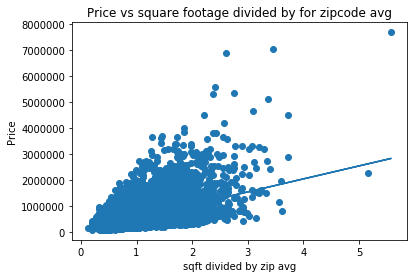

In [88]:
import matplotlib.pyplot as plt
X1_m_hat = lm.coef_[0]
X1_b_hat = lm.intercept_

# Plot the points
plt.scatter(X1['sqft_to_zip_avg'], y)

# Plot the line
X1_y_hat = [X1_m_hat*x + X1_b_hat for x in X1['sqft_to_zip_avg']]
plt.plot(X1['sqft_to_zip_avg'], X1_y_hat)
# Graph axes and title
plt.ylabel("Price")
plt.xlabel("sqft divided by zip avg")
plt.title("Price vs square footage divided by for zipcode avg")
plt.show()


# Yep. Looks like my custom metric was not as insightful as I had hoped.

In [91]:
y_test_predict = lm.predict(X1_test[['sqft_to_zip_avg']])

MSE = mean_squared_error(y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(y_test, y_test_predict)

print('R^2 is {}'.format(R2))

# That is an almost impressively low R^2. Nicely done!

MSE is 102830677362.58293
RMSE is 320672.2273016217
R^2 is 0.2877111043278331


# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [123]:
two_var_xtrain = pd.DataFrame([X1_train['sqft_to_zip_avg'], X1_train['bedrooms']])
two_var_xtest = pd.DataFrame([X1_test['sqft_to_zip_avg'], X1_test['bedrooms']])
two_var_ytrain = y_train
two_var_ytest = y_test


two_var_xtrain = two_var_xtrain.T
lm.fit(two_var_xtrain, y_train)
two_var_pred_train = lm.predict(two_var_xtrain)
two_var_pred_test = lm.predict(two_var_xtrain)
print ("Coefficient: \n",lm.coef_)
print ("\n Intercept: ", lm.intercept_)
beta_0 = lm.intercept_
beta_i = lm.coef_

Coefficient: 
 [491107.55247697   7394.60295698]

 Intercept:  23354.444124843576


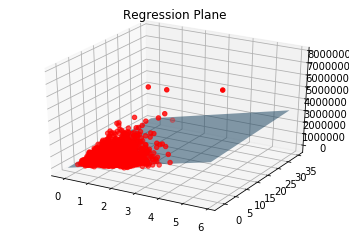

In [127]:
two_var_m_hat = lm.coef_[0], 
two_var_b_hat = lm.intercept_

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(two_var_xtrain['sqft_to_zip_avg'], two_var_xtrain['bedrooms'], two_var_ytrain, c='red')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0

#Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Regression Plane")

plt.show()



In [129]:
two_var_y_test_predict = lm.predict(two_var_xtest.T)

MSE = mean_squared_error(y_test, two_var_y_test_predict)

RMSE = (np.sqrt(mean_squared_error(y_test, two_var_y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(y_test, two_var_y_test_predict)

print('R^2 is {}'.format(R2))

# Yep. Absolutely horrendous. This definitely proves my feature engineering was awful. 

MSE is 102787533411.76581
RMSE is 320604.94913797855
R^2 is 0.2880099544168402


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [132]:
model = LinearRegression()
X1_train = X1_train.drop(['date', 'id'], axis=1)
model.fit(X1_train, y_train)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [-1.97140377e+04  2.72973582e+04 -4.73193234e+01  3.35530951e-01
 -3.16600988e+04  5.98022729e+05  5.16263800e+04  2.18697267e+04
  5.20027564e+04  1.39467139e+01 -6.12660374e+01 -5.05223440e+02
  1.83628667e+01 -1.24980486e+02  1.58564594e+05  1.25827356e+05
  2.09936007e+01 -1.18132330e-01  4.80532165e+03  6.34462119e-01
  3.42649106e+02 -2.65180498e+02  9.62643246e+04]

 Intercept:  20832862.04265843


In [134]:
X1_test = X1_test.drop(['date', 'id'], axis=1)
y_test_predict = model.predict(X1_test)

MSE = mean_squared_error(y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 23626668063.781567
RMSE is 153709.6876055038
R^2 is 0.8363424832433574


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
